In [1]:
data = Import["RedBipartita_Crimenes.csv", "CSV"];

In [2]:
data = Rest[data];

Graph[<833>, <1522>]
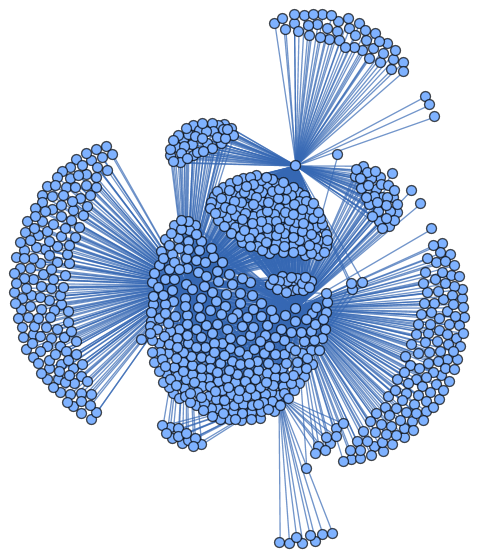

In [3]:
graph = Graph[UndirectedEdge @@@ data]

In [4]:
partition[g_] := Module[{vertex, u, v, c, list},
  vertex = VertexList[g]; 
  u = {};
  v = {};
  c = Complement[vertex, Join[u, v]]; (* Vértices que no están en u ni en v *)
  
  While[c != {}, (* Mientras haya vértices no asignados *)
    list = GraphDistance[g, c[[1]]]; (* Distancias de c[[1]] a todos los vértices *)
    
    (* Iteramos sobre la lista de distancias *)
    For[j = 1, j <= Length[list], j++,
      If[NumericQ[list[[j]]], (* Verificamos si la distancia es numérica *)
        If[EvenQ[list[[j]]], 
          AppendTo[u, vertex[[j]]], (* Si la distancia es par, lo asignamos a u *)
          AppendTo[v, vertex[[j]]]  (* Si la distancia es impar, lo asignamos a v *)
        ]
      ]
    ];
    
    c = Complement[vertex, Join[u, v]] (* Actualizamos c con los vértices no asignados *)
  ];
  
  {u, v} (* Devolvemos los dos conjuntos de vértices *)
]

In [5]:
projections[graph_, setUorV_] :=
  Module[{set, l,projectedGraph, list, list1, added, list2},
  
    set = Switch[setUorV,
      U, partition[graph][[1]],
      V, partition[graph][[2]]
    ];
    l = Length[set];
    projectedGraph = Graph[{}];
    (* Lista de vecinos de cada vértice del conjunto seleccionado *)
    list = AdjacencyList[graph, #] & /@ set;
    (* Itera sobre cada vértice en el conjunto seleccionado (set). *)
    For[i = 1, i <= l, i++,
      
      list1 = list[[i]];
      added = False;
      
      (* Verifica si hay intersección entre vecinos de i y j *)
      For[j = i + 1, j <= l, j++,
        list2 = list[[j]];
        
          If[Intersection[list1, list2] != {},
            projectedGraph = EdgeAdd[projectedGraph, set[[i]] <-> set[[j]]];
            added = True
          ]
        
      ];
      
      (* Si el vértice no fue conectado a nadie, se agrega como nodo aislado *)
      If[!added,
        projectedGraph = VertexAdd[projectedGraph, set[[i]]]
      ]
    ];
    
    projectedGraph
  ]

In [ ]:
graphU = projections[graph, U]

In [ ]:
GraphPlot[graphU]